# Assignment 3: ICP + Non-linear least squares optimization

TEAM-NAME: FAMILY

YOUR-ID: 2019102014 2019102017

YOUR-NAME: Aravind-Narayanan Abhayram-A-Nair

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is **15-09-21** at 11:55pm.
* Plagiarism is **strictly prohibited**

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

In [2]:
from helpers.func import make_gaussian

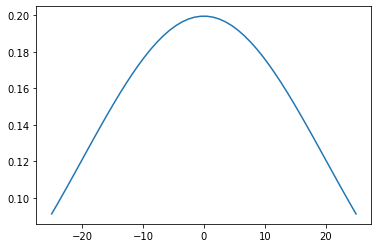

In [3]:
iter = 50
a0 = 10
m0 = 0
s0 = 20
k = [[a0],
     [m0],
     [s0]]
xobs = np.linspace(-25,25,iter)
yobs = np.zeros_like(xobs)
for i in range(iter):
    yobs[i] = make_gaussian(xobs[i],a0,m0,s0)
# print(xobs)
# print(yobs)
plt.plot(xobs,yobs)

In [4]:
def residual(a,m,s,x,y):
#     res = a * np.exp(-(x-m)**2/(2*s**2)) - y
    res = make_gaussian(x,a,m,s) - y 
#     return make_gaussian(x,a,m,s) - y 
    return res.astype('float64')

In [5]:
#Define jacobians
rK = np.zeros(iter).astype('float64')
Jr = np.zeros((3,iter),dtype='float64')
error = np.zeros(2000).astype('float64')
a0 = 10
m0 = 13
s0 = 19.12
tol = 1e-15
k = [[a0],
    [m0],
    [s0]]
for j in range(2000):
    a = k[0][0]
    m = k[1][0]
    s = k[2][0]
    rK = np.zeros(iter).astype('float64')
    Jr = np.zeros((3,iter),dtype='float64')
#     print(m)
    for i in range(iter):
#         print(xobs[i])
#         Jr[0][i] = np.exp(-(xobs[i]-m)**2/(2*s**2))
#         Jr[1][i] = ((a*(xobs[i]-m))/(s**2)) * np.exp(-(xobs[i]-m)**2/(2*(s**2)))
#         Jr[2][i] = ((a*((xobs[i]-m)**2))/(s**3)) * np.exp(-(xobs[i]-m)**2/(2*(s**2)))
        Jr[0][i] = (1/(np.sqrt(2 * np.pi) * s)) * np.exp(-(xobs[i]-m)**2/(2*s**2))
        Jr[1][i] = ((a*(xobs[i]-m))/(np.sqrt(2 * np.pi) * s**2)) * np.exp(-(xobs[i]-m)**2/(2*s**2))
        Jr[2][i] = (a/(np.sqrt(2 * np.pi) * s**2))*(((xobs[i]-(m**2))/(s**2))-1) * np.exp(-(xobs[i]-m)**2/(2*s**2))
        rK[i] = residual(a,m,s,xobs[i],yobs[i])
#     Jr = Jr.T
    error[j] = np.linalg.norm(rK)
    rK = np.array(rK)[np.newaxis]
    rK = rK.T
#     print(Jr)
#     print(rK)
#     print(rK.shape)
#     print(Jr.shape)
    Jf = np.matmul(Jr,rK)
#     print(Jf)
    alpha = 0.05
    deltaK = -alpha*Jf
#     print(deltaK)
#     print(deltaK)
    k = k + deltaK
    if ((abs(deltaK[0][0])<tol) & (abs(deltaK[1][0])<tol) & (abs(deltaK[2][0])<tol)) :
        print("Stopped")
        break
#     print(k)
#     print(newK)

In [6]:
# print(rK)
# print(Jr)

In [7]:
print(k)

[[ 9.79174376]
 [ 1.38743943]
 [19.21269373]]


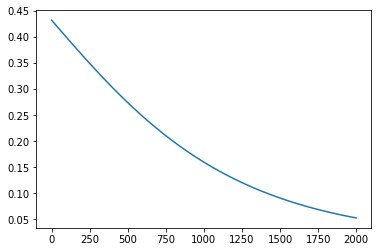

In [8]:
plotX = list(range(2000))
plotX = np.array(plotX)
# print(plotX)
plt.plot(plotX,error)

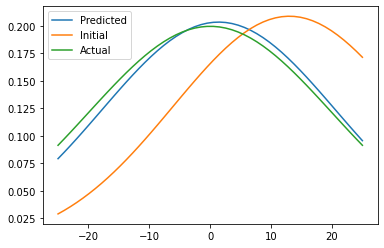

In [9]:
xP = np.linspace(-25,25,iter)
yP = np.zeros_like(xobs)
yF = np.zeros_like(xobs)
a0 = 10
m0 = 13
s0 = 19.12
for i in range(iter):
    yP[i] = make_gaussian(xP[i],k[0][0],k[1][0],k[2][0])
    yF[i] = make_gaussian(xP[i],a0,m0,s0)
# print(xP)
# print(yP)
plt.plot(xP,yP)
plt.plot(xP,yF)
plt.plot(xobs,yobs)
plt.legend(['Predicted','Initial','Actual'])

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.



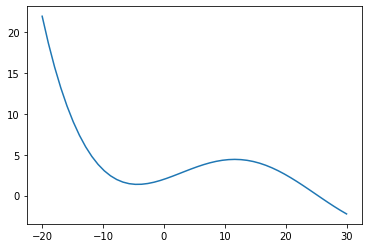

In [10]:
from helpers.func import make_non_linear
iter = 50
p1 = 2
p2 = 8
p3 = 4
p4 = 8
k = [[p1],
     [p2],
     [p3],
     [p4]]
xobs = np.linspace(-20,30,iter)
yobs = np.zeros_like(xobs)
for i in range(iter):
    yobs[i] = make_non_linear(xobs[i],p1,p2,p3,p4)
# print(xobs)
# print(yobs)
plt.plot(xobs,yobs)

In [11]:
def residual(p1,p2,p3,p4,x,y):
#     res = a * np.exp(-(x-m)**2/(2*s**2)) - y
    res = make_non_linear(x,p1,p2,p3,p4) - y 
#     return make_gaussian(x,a,m,s) - y 
    return res.astype('float64')

In [12]:
#Define jacobians
rK = np.zeros(iter).astype('float64')
Jr = np.zeros((4,iter),dtype='float64')
error = np.zeros(200).astype('float64')
p1 = 2
p2 = 10
p3 = 5
p4 = 5
tol = 1e-15
k = [[p1],
    [p2],
    [p3],
    [p4]]
for j in range(200):
    p1 = k[0][0]
    p2 = k[1][0]
    p3 = k[2][0]
    p4 = k[3][0]
    rK = np.zeros(iter).astype('float64')
    Jr = np.zeros((4,iter),dtype='float64')
#     print(m)
    for i in range(iter):
#         print(xobs[i])
#         Jr[0][i] = np.exp(-(xobs[i]-m)**2/(2*s**2))
#         Jr[1][i] = ((a*(xobs[i]-m))/(s**2)) * np.exp(-(xobs[i]-m)**2/(2*(s**2)))
#         Jr[2][i] = ((a*((xobs[i]-m)**2))/(s**3)) * np.exp(-(xobs[i]-m)**2/(2*(s**2)))
        Jr[0][i] = math.exp(-xobs[i] / p2)
        Jr[1][i] = (p1*xobs[i]/(p2**2)) * math.exp(-xobs[i] / p2)
        Jr[2][i] = math.sin(xobs[i] / p4)
        Jr[3][i] = (-p3*xobs[i]/(p4**2)) * math.cos(xobs[i] / p4)
        rK[i] = residual(p1,p2,p3,p4,xobs[i],yobs[i])
#     Jr = Jr.T
    error[j] = np.linalg.norm(rK)**2
    rK = np.array(rK)[np.newaxis]
    rK = rK.T
#     print(Jr)
#     print(rK)
#     print(rK.shape)
#     print(Jr.shape)
    Jf = np.matmul(Jr,rK)
#     print(Jf)
    alpha = 0.001
    deltaK = -alpha*Jf
#     print(deltaK)
#     print(deltaK)
    k = k + deltaK
    if ((abs(deltaK[0][0])<tol) & (abs(deltaK[1][0])<tol) & (abs(deltaK[2][0])<tol)) :
        print("Stopped")
        break
#     print(k)
#     print(newK)
print(k)

[[2.3316084 ]
 [8.65833857]
 [4.01128525]
 [7.86287874]]


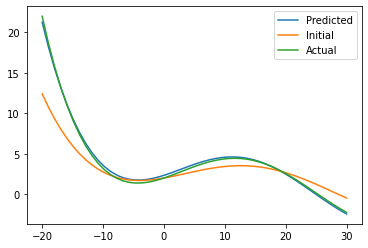

In [13]:
xP = np.linspace(-20,30,iter)
yP = np.zeros_like(xP)
yF = np.zeros_like(xP)
p1 = k[0][0]
p2 = k[1][0]
p3 = k[2][0]
p4 = k[3][0]
for i in range(iter):
    yP[i] = make_non_linear(xP[i],p1,p2,p3,p4)
# print(xP)
# print(yP)
plt.plot(xP,yP)
p1 = 2
p2 = 10
p3 = 3
p4 = 9
for i in range(iter):
    yF[i] = make_non_linear(xP[i],p1,p2,p3,p4)
plt.plot(xP,yF)
plt.plot(xobs,yobs)
plt.legend(['Predicted','Initial','Actual'])

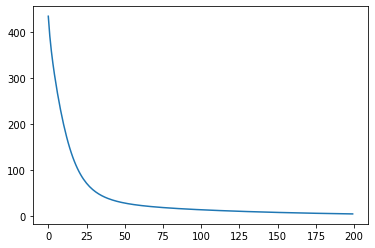

In [15]:
plotX = list(range(200))
plotX = np.array(plotX)
# print(plotX)
plt.plot(plotX,error)

**Questions**
   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

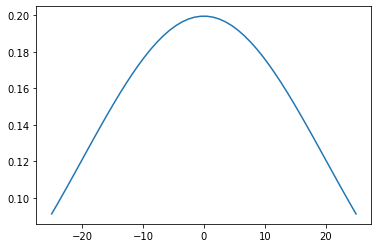

In [16]:
iter = 50
a0 = 10
m0 = 0
s0 = 20
k = [[a0],
     [m0],
     [s0]]
xobs = np.linspace(-25,25,iter)
yobs = np.zeros_like(xobs)
for i in range(iter):
    yobs[i] = make_gaussian(xobs[i],a0,m0,s0)
# print(xobs)
# print(yobs)
plt.plot(xobs,yobs)

In [17]:
def residual(a,m,s,x,y):
#     res = a * np.exp(-(x-m)**2/(2*s**2)) - y
    res = make_gaussian(x,a,m,s) - y 
#     return make_gaussian(x,a,m,s) - y 
    return res.astype('float64')

In [29]:
#Define jacobians
rK = np.zeros(iter).astype('float64')
Jr = np.zeros((3,iter),dtype='float64')
error = np.zeros(200).astype('float64')
a0 = 10
m0 = 13
s0 = 19.12
tol = 1e-15
k = [[a0],
    [m0],
    [s0]]
for j in range(200):
    a = k[0][0]
    m = k[1][0]
    s = k[2][0]
    rK = np.zeros(iter).astype('float64')
    Jr = np.zeros((3,iter),dtype='float64')
#     print(m)
    for i in range(iter):
#         print(xobs[i])
#         Jr[0][i] = np.exp(-(xobs[i]-m)**2/(2*s**2))
#         Jr[1][i] = ((a*(xobs[i]-m))/(s**2)) * np.exp(-(xobs[i]-m)**2/(2*(s**2)))
#         Jr[2][i] = ((a*((xobs[i]-m)**2))/(s**3)) * np.exp(-(xobs[i]-m)**2/(2*(s**2)))
        Jr[0][i] = (1/(np.sqrt(2 * np.pi) * s)) * np.exp(-(xobs[i]-m)**2/(2*s**2))
        Jr[1][i] = ((a*(xobs[i]-m))/(np.sqrt(2 * np.pi) * s**2)) * np.exp(-(xobs[i]-m)**2/(2*s**2))
        Jr[2][i] = (a/(np.sqrt(2 * np.pi) * s**2))*(((xobs[i]-(m**2))/(s**2))-1) * np.exp(-(xobs[i]-m)**2/(2*s**2))
        rK[i] = residual(a,m,s,xobs[i],yobs[i])
    Jr = Jr.T
    error[j] = np.linalg.norm(rK)**2
    rK = np.array(rK)[np.newaxis]
    rK = rK.T
#     print(Jr)
#     print(rK)
#     print(rK.shape)
#     print(Jr.shape)
    Jf = np.linalg.pinv(Jr.T@Jr)@Jr.T@rK
#     print(Jf)
    alpha = 0.05
    deltaK = Jf
#     print(deltaK)
#     print(deltaK)
    k = k - deltaK
    if ((abs(deltaK[0][0])<tol) & (abs(deltaK[1][0])<tol) & (abs(deltaK[2][0])<tol)) :
        print(deltaK)
        print("Stopped")
        break
#     print(k)
#     print(newK)

[[9.81905796e+00]
 [3.47126579e-04]
 [1.94451667e+01]]


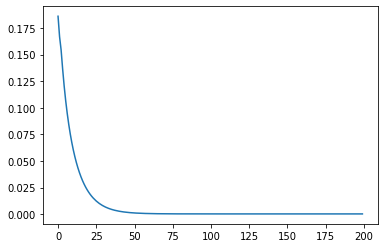

In [30]:
print(k)
plotX = list(range(200))
plotX = np.array(plotX)
# print(plotX)
plt.plot(plotX,error)

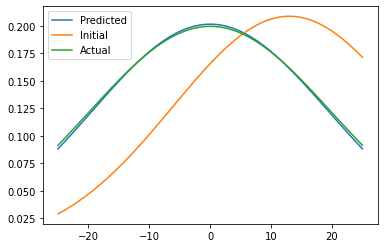

In [31]:
xP = np.linspace(-25,25,iter)
yP = np.zeros_like(xobs)
yF = np.zeros_like(xobs)
a0 = 10
m0 = 13
s0 = 19.12
for i in range(iter):
    yP[i] = make_gaussian(xP[i],k[0][0],k[1][0],k[2][0])
    yF[i] = make_gaussian(xP[i],a0,m0,s0)
# print(xP)
# print(yP)
plt.plot(xP,yP)
plt.plot(xP,yF)
plt.plot(xobs,yobs)
plt.legend(['Predicted','Initial','Actual'])

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


## 1)

In [1]:
import open3d as o3d
import copy

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [116]:
def procrustes(pts1,pts2):
    #computing the centre of mass of points / their average locations
    com1 = np.mean(pts1,axis=0)
    com2 = np.mean(pts2,axis=0)
    
    #centering the two point clouds
    centredpts1 = pts1-com1
    centredpts2 = pts2-com2
    
    #using svd to find the rotation matrix
    A = centredpts2.T @ centredpts1
    U,D,Vt = np.linalg.svd(A)
    
    #this is the correction term which has to be multiplied so as to prevent the case of reflection
    C = np.eye(3)
    if np.linalg.det(U @ Vt) < 0:
        C = np.array([[1,0,0][0,1,0][0,0,-1]])
        
    #finding the rotation and translation as per the procrustes alignment algorithm
    R = Vt.T @ C @ U.T
    t = com1 - R @ com2
    
    #finding the transformation matrix
    T = np.zeros((4,4))
    T[:3,:3] = R
    T[3,3] = 1
    T[:3,3] = t.T
    return T

## 2)

In [122]:
bunny = o3d.io.read_point_cloud("bunny.ply") #loading bunny
pts1 = np.asarray(bunny.points) #converting into numpy array of points
#random transform
Ri = np.array([[-0.5232657,-0.7992877,0.2955202],
              [0.8163163,-0.5696766,-0.0953745],
              [0.2445826,0.1913317,0.9505638]])
ti = np.reshape(np.array([0.2,0.3,0.1]), (3,1))

#creating a new set of points which is the transformed version of bunny
pts2 = (Ri @ pts1.T + ti).T

#painting them different colours
bunny1 = o3d.geometry.PointCloud()
bunny1.points = o3d.utility.Vector3dVector(pts1)
bunny1.paint_uniform_color([1,0.8,0.4])

bunny2 = o3d.geometry.PointCloud()
bunny2.points = o3d.utility.Vector3dVector(pts2)
bunny2.paint_uniform_color([0,0.8,0.4])

#creating coordinate frames to go along with them
mesh_frame1 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.125, origin=[0, 0, 0])
mesh_frame2 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.125, origin=[0, 0, 0])

#creating the transform matrix
Ti = np.zeros((4,4))
Ti[:3,:3] = Ri
Ti[3,3] = 1
Ti[:3,3] = ti.T

#tranforming one of the newly created coordinate frames to match the transformed bunny
mesh_frame2.transform(Ti)

TriangleMesh with 1134 points and 2240 triangles.

In [123]:
#viewing the tranformed bunny and original bunny before alignment
o3d.visualization.draw_geometries([bunny1,bunny2,mesh_frame1,mesh_frame2])

In [124]:
To = procrustes(pts1,pts2)

#applying the found tranform on the second point clound and meshframe
mesh_frame2.transform(To)
bunny2.transform(To)

PointCloud with 35947 points.

In [125]:
#visualising the point clouds after alignment
o3d.visualization.draw_geometries([bunny1,bunny2,mesh_frame1,mesh_frame2])

In [132]:
#finding the absolute alignment error
pts1 = np.asarray(bunny1.points)
pts2 = np.asarray(bunny2.points)
absolute_alignment_error = np.mean(np.abs(pts1-pts2))
print(f'{absolute_alignment_error} is the absolute alignment error')

1.3833830424464044e-09 is the absolute alignment error


## 4)

In [4]:
import os
%pwd
%ls

Assignment-3.ipynb  helpers/             proof_page-0003.jpg
bunny.ply*          proof_page-0001.jpg  proof_page-0004.jpg
GN.ipynb            proof_page-0002.jpg  proof.pdf


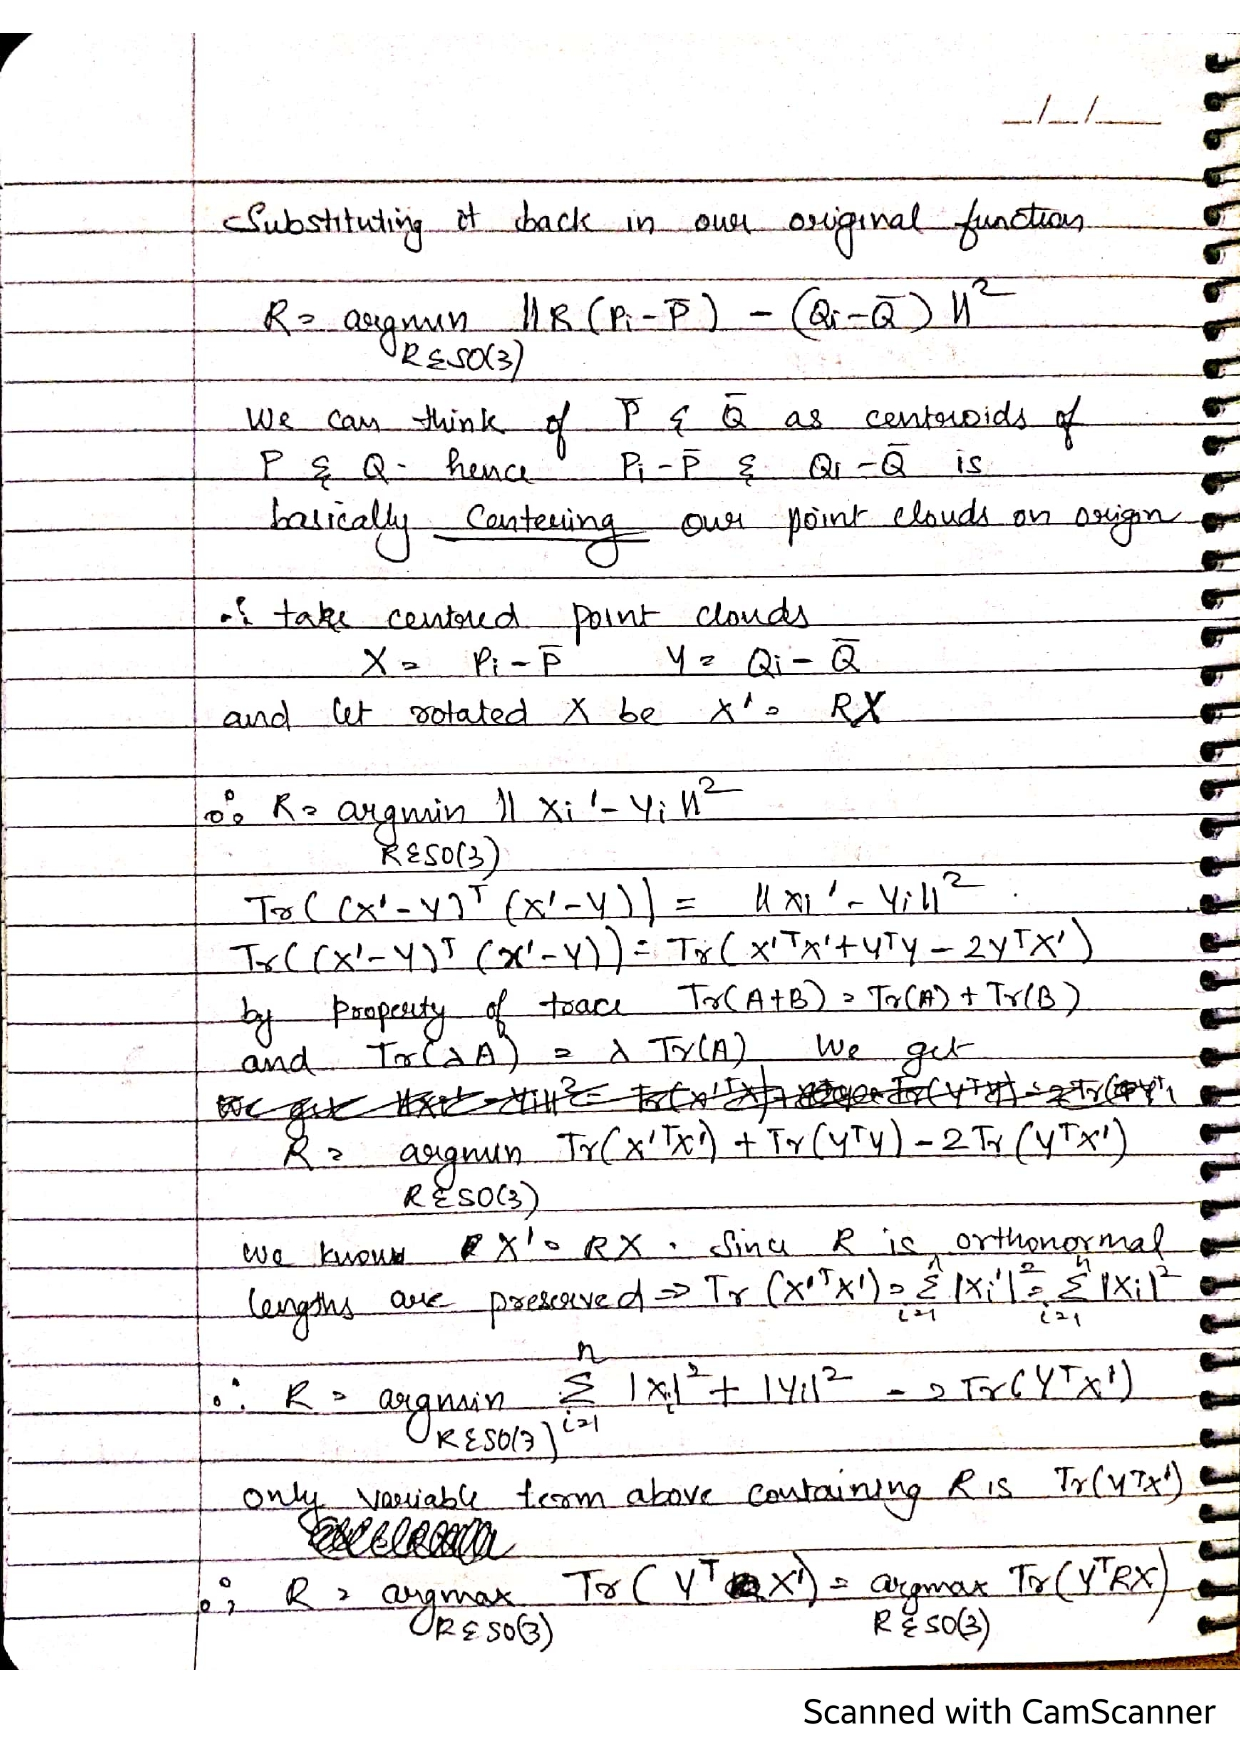

In [6]:
from IPython import display
display.Image("./proof_page-0001.jpg")

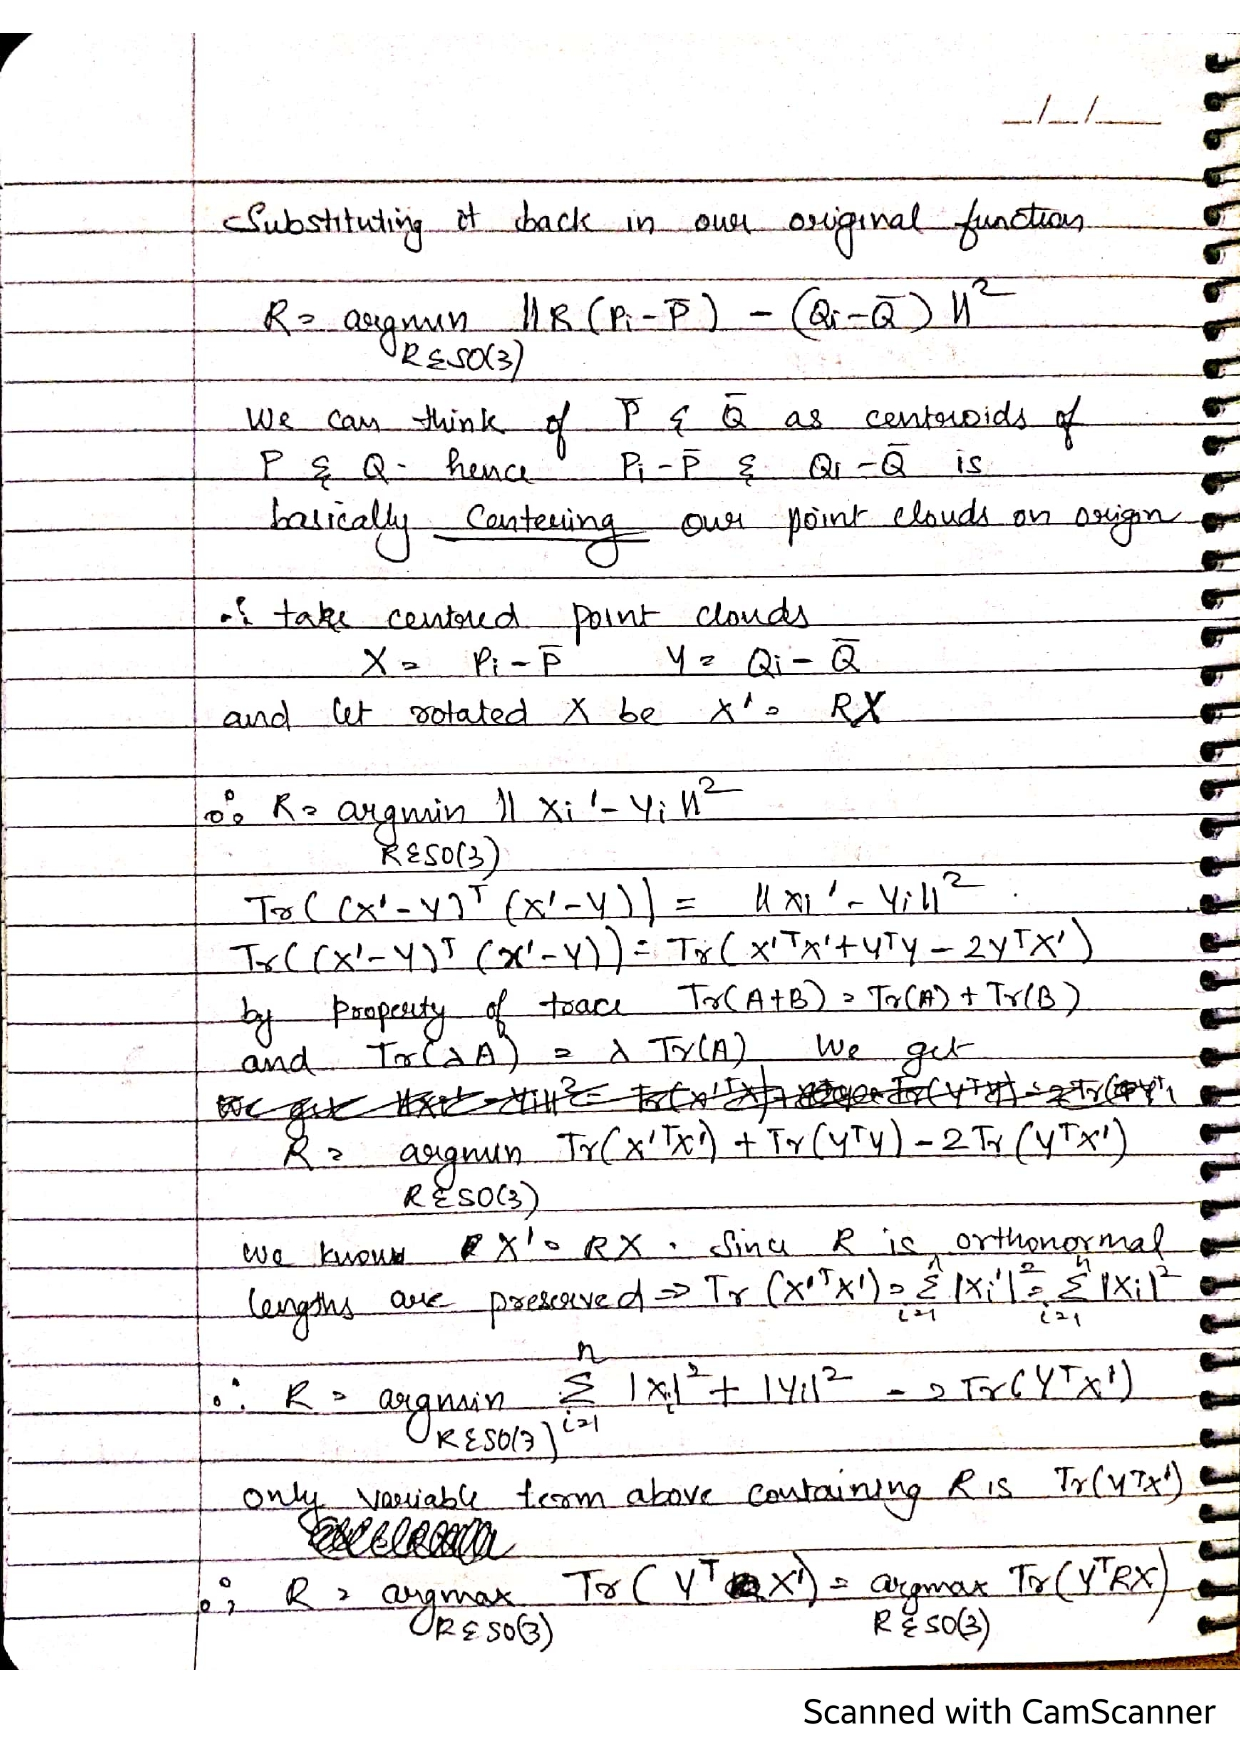

In [7]:
display.Image("./proof_page-0002.jpg")

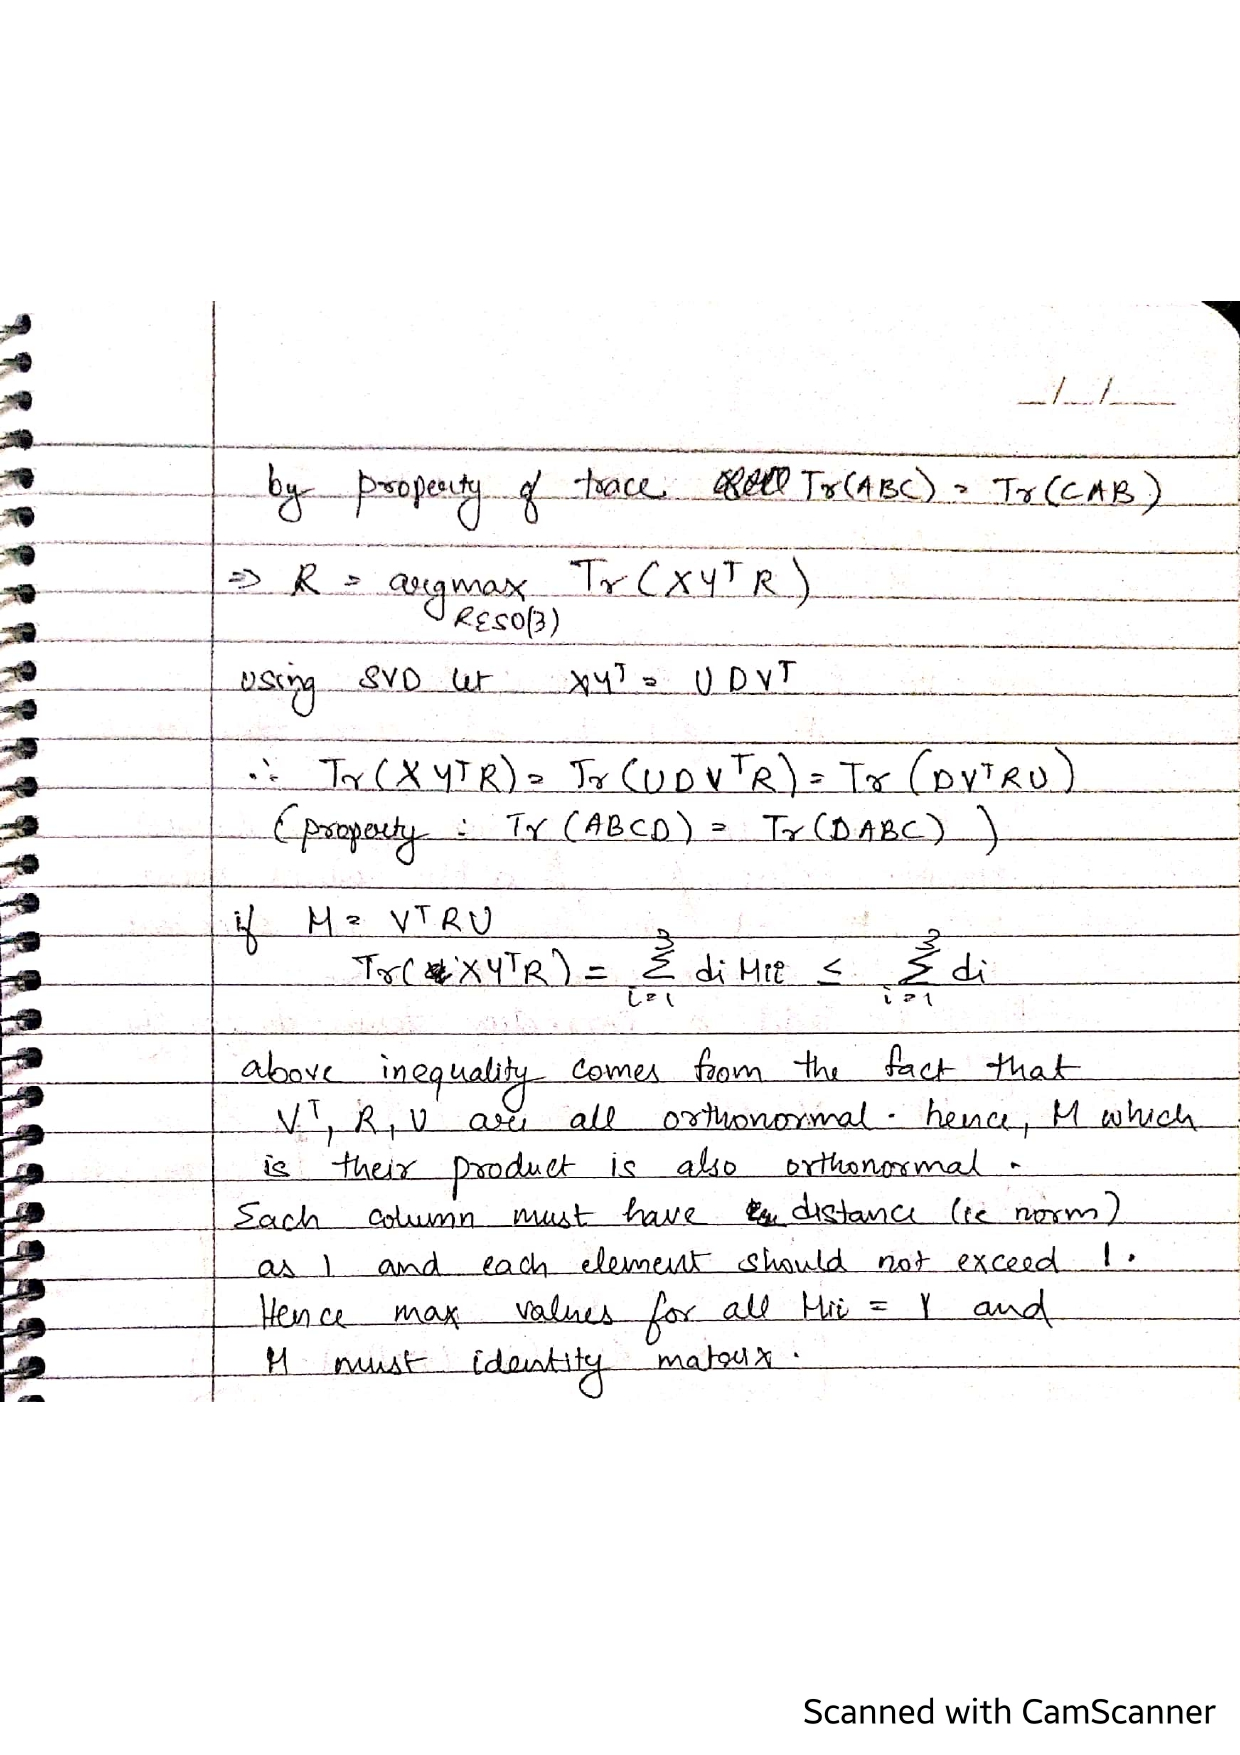

In [8]:
display.Image("./proof_page-0003.jpg")

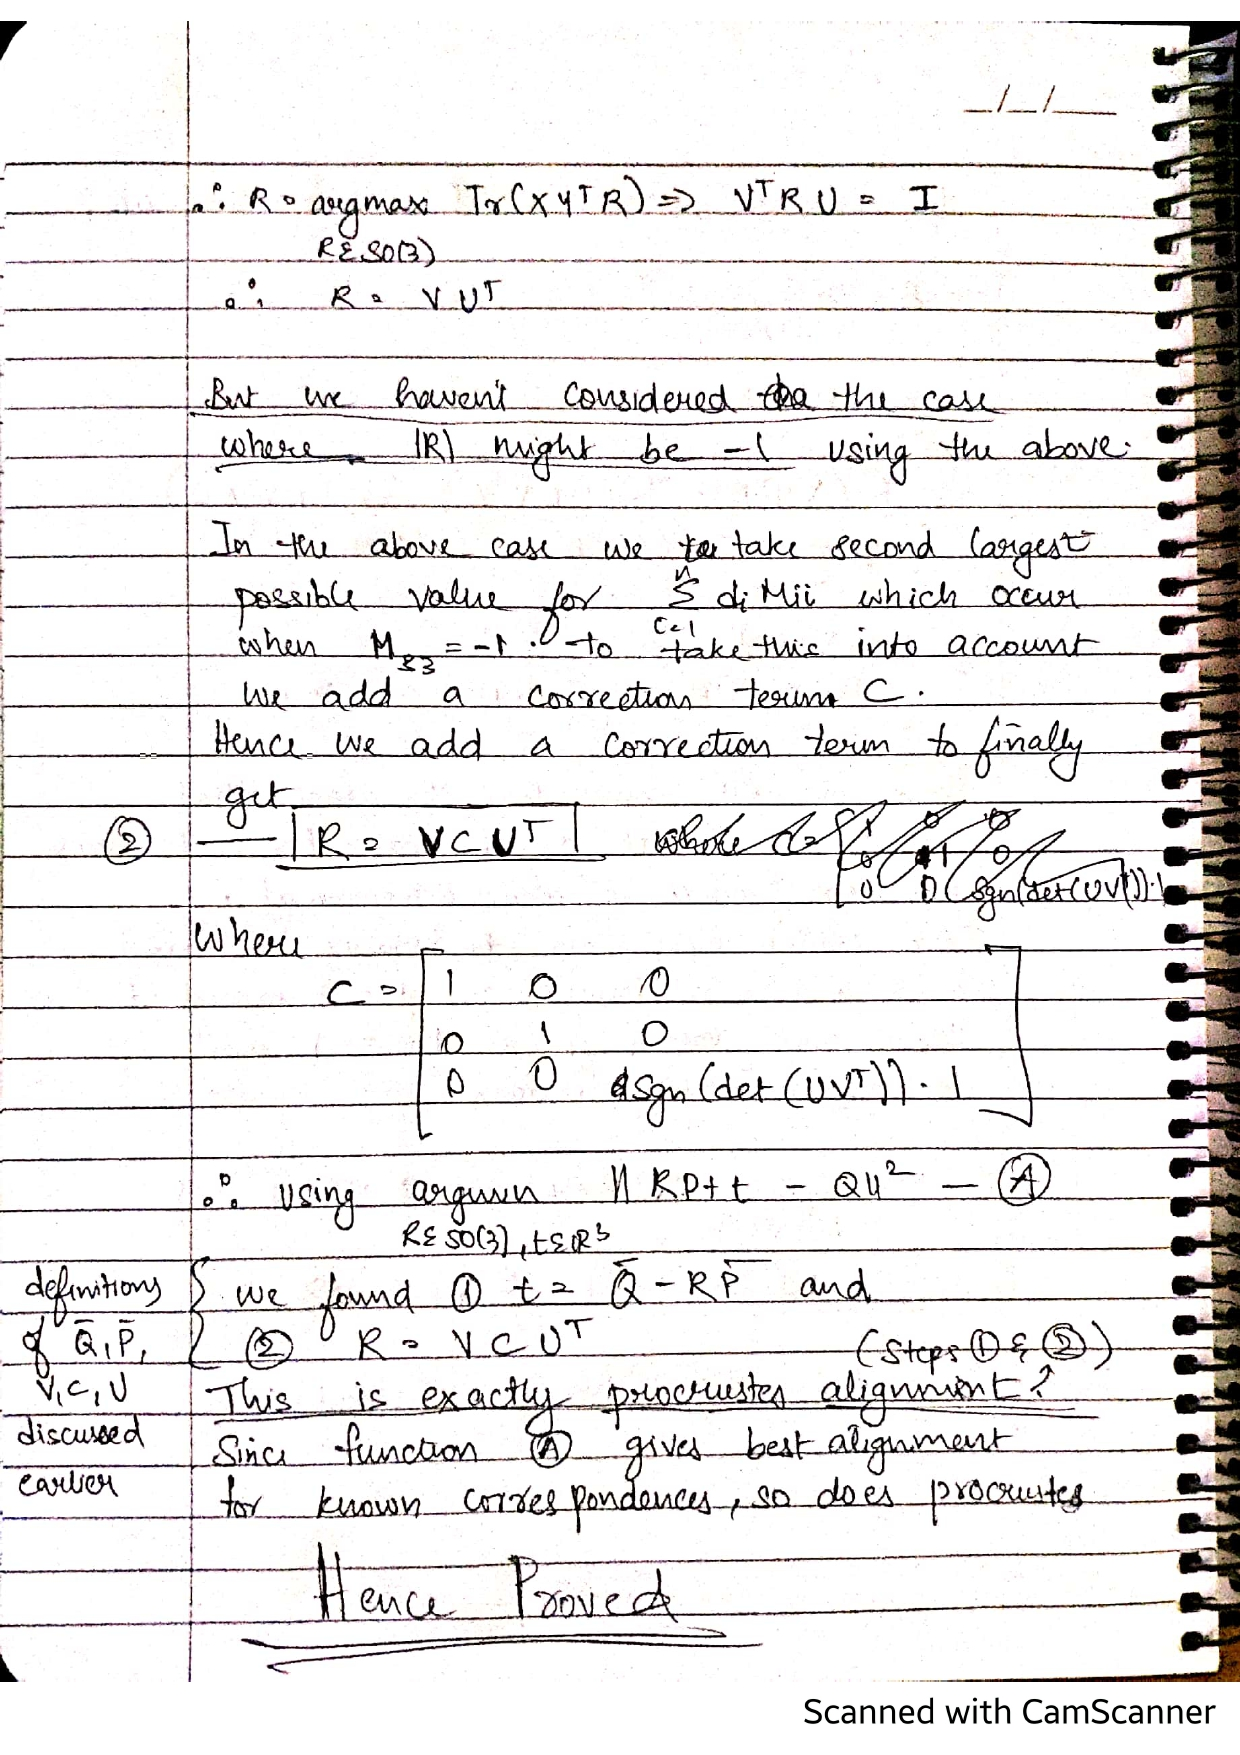

In [9]:
display.Image("./proof_page-0004.jpg")

## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

In [60]:
from sklearn.neighbors import KDTree

#used for nearest_neighbour index array and distance array
def nearest_neighbours(pts1,pts2,tree):
    indxarray = np.zeros(pts2.shape[0])
    distancearray = np.zeros(pts2.shape[0])
    for i in range(pts2.shape[0]):
        distance,indx = tree.query(np.reshape(pts2[i],(1,3)), 1)
        indxarray[i] = indx
        distancearray[i] = distance
    return indxarray.astype(int),distancearray

In [100]:
def icp(pts1,pts2org,iterations,tolerance):
    #creating a copy of original set of points pts2org
    pts2 = np.copy(pts2org)
    #sees if tolerance reached
    flag = 0
    #we will use this for nearest neighbour calculations
    tree = KDTree(pts1)
    #computing original absolute alignment error for tolerance requirements
    absolute_alignment_error_previous = np.mean(np.abs(pts1-pts2))
    #original uncomputed tranform is identity matrix
    T = np.eye(4)
    
    for i in range(iterations):
        #getting set of nearest neighbour correspondences in pts1 for pts2 and their distances
        indxarray,distancearray = nearest_neighbours(pts1,pts2,tree)
        #value to check for tolerance
        alpha = np.abs(np.mean(np.abs(distancearray)) - absolute_alignment_error_previous)
        
        #checking and aborting if tolerance reached
        if(alpha<tolerance):
            flag=1
            print('exiting icp on reaching tolerance')
            print(f'{i} is the number of executed iterations')
            break
        
        absolute_alignment_error_previous = np.mean(np.abs(distancearray))
        #running procrustes using nearest neighbour corresondences we received
        To = procrustes(pts1[indxarray],pts2)

        print(f'{alpha} is the current change in absolute alignment error')
        
        pts2homogenous = np.ones((pts2.shape[0],pts2.shape[1]+1))
        pts2homogenous[:,:3] = pts2
        pts2transformed = To @ pts2homogenous.T 
        pts2 = pts2transformed[:3,:].T
        
        T = To@T
    if(flag==0):
        print('exiting icp on reaching iteration maximum')
    return T

In [104]:
bunny = o3d.io.read_point_cloud("bunny.ply") #loading bunny
pts1 = np.asarray(bunny.points) #converting into numpy array of points
#random transform
Ri = np.array([[-0.5232657,-0.7992877,0.2955202],
              [0.8163163,-0.5696766,-0.0953745],
              [0.2445826,0.1913317,0.9505638]])
ti = np.reshape(np.array([0.2,0.3,0.1]), (3,1))

#creating a new set of points which is the transformed version of bunny
pts2 = (Ri @ pts1.T + ti).T

#painting them different colours
bunny1 = o3d.geometry.PointCloud()
bunny1.points = o3d.utility.Vector3dVector(pts1)
bunny1.paint_uniform_color([1,0.8,0.4])

bunny2 = o3d.geometry.PointCloud()
bunny2.points = o3d.utility.Vector3dVector(pts2)
bunny2.paint_uniform_color([0,0.8,0.4])

#creating coordinate frames to go along with them
mesh_frame1 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.125, origin=[0, 0, 0])
mesh_frame2 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.125, origin=[0, 0, 0])

#creating the transform matrix
Ti = np.zeros((4,4))
Ti[:3,:3] = Ri
Ti[3,3] = 1
Ti[:3,3] = ti.T

#tranforming one of the newly created coordinate frames to match the transformed bunny
mesh_frame2.transform(Ti)

TriangleMesh with 1134 points and 2240 triangles.

In [105]:
#before icp
o3d.visualization.draw_geometries([bunny1,bunny2,mesh_frame1,mesh_frame2])

In [106]:
To = icp(pts1,pts2,5,0.0001)

0.048333197071320055 is the current change in absolute alignment error
0.15501942916955175 is the current change in absolute alignment error
0.00896050556012994 is the current change in absolute alignment error
0.0036082513505649137 is the current change in absolute alignment error
0.00189101510001264 is the current change in absolute alignment error
exiting icp on reaching iteration maximum


In [96]:
#applying transformation received from icp onto second bunny and meshframe
mesh_frame2.transform(To)
bunny2.transform(To)
o3d.visualization.draw_geometries([bunny1,bunny2,mesh_frame1,mesh_frame2])

## 3)

No ICP does not always give correct alignment. This is because of the nearest neighbour step in ICP. 

When doing orthogonal procrustes, if all the correct correspondences are known and there exists no noise, then we are guaranteed to get a perfect alignment in a single step. 

However in the ICP algorithm, we have no way of finding the perfect correspondences. Therefore we use a nearest neighbour approach where we take each point in the second set of points (lets say we want to align this with the first set of points) and find the nearest neighbour to it in the first set of points. We set the correspondence of each point in this second set of points as the nearest neighbour found in the first set. This can lead to many points in the second set to have the same correspondence in the first set. 

The above reason can cause the ICP algorithm to get stuck at a particular orientation that does not allow for perfect alignment because of incorrect correspondences. 

This is why ICP cannot get perfect alignment every time. This problem is seen more when there is a huge misalignment between the two sets of points since nearest neighbour will never be able to find the correct correspondences.

## 4)

Point-to-Plane ICP and Generalized ICP are two other variants of ICP. They consider the fact that the object we are looking at has surfaces and that the points lie somewhere on those surfaces. Point-to-Point (the version we have implemented) ICP minimizes distance between sets of points and does not consider surfaces.

Point-to-Plane changes the cost function over which we operate. ICP minimizes squared distance between points. in Point-to-Plane ICP we project the point to point error vector onto the normal of the surface. this make the proof based on svd impossible and hence a least squares approach is taken.

Generalized icp is a generalised version that combines Point-to-Point, Point-to-Plane and Plane-to-Plane metrics for ICP.

In practice we find that these variants converge in lesser iterations. This can be because they try to align the surfaces rather that just trying to align individual points. 

Therefore these variants are useful since they converge in lesser iterations and take into account the fact that points lie on a surface.